In [4]:
#Your objective is to build a series of scatter plots to showcase the following relationships:


#Temperature (F) vs. Latitude
#Humidity (%) vs. Latitude
#Cloudiness (%) vs. Latitude
#Wind Speed (mph) vs. Latitude

#Your final notebook must:


## Randomly select at least 500 unique (non-repeat) cities based on latitude and longitude.
## Perform a weather check on each of the cities using a series of successive API calls.
## Include a print log of each city as it's being processed with the city number and city name.
## Save both a CSV of all data retrieved and png images for each scatter plot.


#As final considerations:


## You must complete your analysis using a Jupyter notebook.
## You must use the Matplotlib or Pandas plotting libraries.
## You must include a written description of three observable trends based on the data.
## You must use proper labeling of your plots, including aspects like: Plot Titles (with date of analysis) and Axes Labels.
# with gridlines


TRENDS

1. Temperature definitely increased closer to the equator.
2. Humidity increase some closer to the equator.
3. Cloudiness did not really seem to be effected.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import requests


# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)



In [2]:
from config import api_key

In [3]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "Imperial"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="
print(query_url)

http://api.openweathermap.org/data/2.5/weather?appid=791286138f829259ea18a2fb386b4598&units=Imperial&q=


In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count

len(cities)



650

In [5]:
print(cities)


['airai', 'lower hutt', 'berdigestyakh', 'severo-kurilsk', 'lauro muller', 'ushuaia', 'ogaminana', 'avarua', 'clyde river', 'albany', 'port alfred', 'bengkulu', 'padang', 'canon city', 'assiniboia', 'amderma', 'tasiilaq', 'punta arenas', 'hilo', 'lisakovsk', 'garoua', 'kodiak', 'lompoc', 'dikson', 'kapaa', 'vaini', 'rawah', 'yar-sale', 'souillac', 'ankang', 'tabiauea', 'jalu', 'bluff', 'grand river south east', 'piranhas', 'puerto ayora', 'osorno', 'george town', 'hasaki', 'medicine hat', 'tsihombe', 'lac du bonnet', 'mount gambier', 'castro', 'ha tinh', 'rikitea', 'naze', 'moose factory', 'russell', 'te anau', 'tarakan', 'cape town', 'tautira', 'coihaique', 'nemuro', 'presidencia roque saenz pena', 'busselton', 'olafsvik', 'taolanaro', 'horconcitos', 'port-gentil', 'bilma', 'mollendo', 'port elizabeth', 'xuzhou', 'saldanha', 'kikwit', 'pochutla', 'cidreira', 'gourcy', 'longyearbyen', 'nikolskoye', 'illoqqortoormiut', 'yellowknife', 'hami', 'pisco', 'hermanus', 'bathsheba', 'hirara', '

In [6]:
# request calls

lat = []
temp = []
humidity = []
wind = []
clouds = []
name = []
speed = []

for city in cities:
    
    response = requests.get(query_url + city).json()
    
    print(query_url)
    print(city)
    try:
        clouds.append(response['clouds']['all'])
    except KeyError:  
        print(response)
        
    
    try:
        lat.append(response['coord']['lat'])
    except KeyError:    
        print(response)
    try:    
        temp.append(response['main']['temp'])
    except KeyError:    
        print(response)
    try:    
        humidity.append(response['main']['humidity'])
    except KeyError:    
        print(response)
    try:    
        wind.append(response['wind']['speed'])
    except KeyError:    
        print(response)
    time.sleep(1.5)  
    
    
         

http://api.openweathermap.org/data/2.5/weather?appid=791286138f829259ea18a2fb386b4598&units=Imperial&q=
airai
http://api.openweathermap.org/data/2.5/weather?appid=791286138f829259ea18a2fb386b4598&units=Imperial&q=
lower hutt
http://api.openweathermap.org/data/2.5/weather?appid=791286138f829259ea18a2fb386b4598&units=Imperial&q=
berdigestyakh
http://api.openweathermap.org/data/2.5/weather?appid=791286138f829259ea18a2fb386b4598&units=Imperial&q=
severo-kurilsk
http://api.openweathermap.org/data/2.5/weather?appid=791286138f829259ea18a2fb386b4598&units=Imperial&q=
lauro muller
http://api.openweathermap.org/data/2.5/weather?appid=791286138f829259ea18a2fb386b4598&units=Imperial&q=
ushuaia
http://api.openweathermap.org/data/2.5/weather?appid=791286138f829259ea18a2fb386b4598&units=Imperial&q=
ogaminana
http://api.openweathermap.org/data/2.5/weather?appid=791286138f829259ea18a2fb386b4598&units=Imperial&q=
avarua
http://api.openweathermap.org/data/2.5/weather?appid=791286138f829259ea18a2fb386b459

http://api.openweathermap.org/data/2.5/weather?appid=791286138f829259ea18a2fb386b4598&units=Imperial&q=
horconcitos
http://api.openweathermap.org/data/2.5/weather?appid=791286138f829259ea18a2fb386b4598&units=Imperial&q=
port-gentil
http://api.openweathermap.org/data/2.5/weather?appid=791286138f829259ea18a2fb386b4598&units=Imperial&q=
bilma
http://api.openweathermap.org/data/2.5/weather?appid=791286138f829259ea18a2fb386b4598&units=Imperial&q=
mollendo
http://api.openweathermap.org/data/2.5/weather?appid=791286138f829259ea18a2fb386b4598&units=Imperial&q=
port elizabeth
http://api.openweathermap.org/data/2.5/weather?appid=791286138f829259ea18a2fb386b4598&units=Imperial&q=
xuzhou
http://api.openweathermap.org/data/2.5/weather?appid=791286138f829259ea18a2fb386b4598&units=Imperial&q=
saldanha
http://api.openweathermap.org/data/2.5/weather?appid=791286138f829259ea18a2fb386b4598&units=Imperial&q=
kikwit
http://api.openweathermap.org/data/2.5/weather?appid=791286138f829259ea18a2fb386b4598&units

http://api.openweathermap.org/data/2.5/weather?appid=791286138f829259ea18a2fb386b4598&units=Imperial&q=
zhigansk
http://api.openweathermap.org/data/2.5/weather?appid=791286138f829259ea18a2fb386b4598&units=Imperial&q=
tuatapere
http://api.openweathermap.org/data/2.5/weather?appid=791286138f829259ea18a2fb386b4598&units=Imperial&q=
poshekhonye
http://api.openweathermap.org/data/2.5/weather?appid=791286138f829259ea18a2fb386b4598&units=Imperial&q=
lebu
http://api.openweathermap.org/data/2.5/weather?appid=791286138f829259ea18a2fb386b4598&units=Imperial&q=
mae sai
http://api.openweathermap.org/data/2.5/weather?appid=791286138f829259ea18a2fb386b4598&units=Imperial&q=
synya
http://api.openweathermap.org/data/2.5/weather?appid=791286138f829259ea18a2fb386b4598&units=Imperial&q=
kruisfontein
http://api.openweathermap.org/data/2.5/weather?appid=791286138f829259ea18a2fb386b4598&units=Imperial&q=
bredasdorp
http://api.openweathermap.org/data/2.5/weather?appid=791286138f829259ea18a2fb386b4598&units=Im

http://api.openweathermap.org/data/2.5/weather?appid=791286138f829259ea18a2fb386b4598&units=Imperial&q=
thompson
http://api.openweathermap.org/data/2.5/weather?appid=791286138f829259ea18a2fb386b4598&units=Imperial&q=
pangai
http://api.openweathermap.org/data/2.5/weather?appid=791286138f829259ea18a2fb386b4598&units=Imperial&q=
roma
http://api.openweathermap.org/data/2.5/weather?appid=791286138f829259ea18a2fb386b4598&units=Imperial&q=
tiksi
http://api.openweathermap.org/data/2.5/weather?appid=791286138f829259ea18a2fb386b4598&units=Imperial&q=
itaituba
http://api.openweathermap.org/data/2.5/weather?appid=791286138f829259ea18a2fb386b4598&units=Imperial&q=
verkhnyaya inta
http://api.openweathermap.org/data/2.5/weather?appid=791286138f829259ea18a2fb386b4598&units=Imperial&q=
hithadhoo
http://api.openweathermap.org/data/2.5/weather?appid=791286138f829259ea18a2fb386b4598&units=Imperial&q=
necochea
http://api.openweathermap.org/data/2.5/weather?appid=791286138f829259ea18a2fb386b4598&units=Imper

http://api.openweathermap.org/data/2.5/weather?appid=791286138f829259ea18a2fb386b4598&units=Imperial&q=
qostanay
http://api.openweathermap.org/data/2.5/weather?appid=791286138f829259ea18a2fb386b4598&units=Imperial&q=
huarmey
http://api.openweathermap.org/data/2.5/weather?appid=791286138f829259ea18a2fb386b4598&units=Imperial&q=
vigrestad
http://api.openweathermap.org/data/2.5/weather?appid=791286138f829259ea18a2fb386b4598&units=Imperial&q=
hofn
http://api.openweathermap.org/data/2.5/weather?appid=791286138f829259ea18a2fb386b4598&units=Imperial&q=
jalapa
http://api.openweathermap.org/data/2.5/weather?appid=791286138f829259ea18a2fb386b4598&units=Imperial&q=
yoichi
http://api.openweathermap.org/data/2.5/weather?appid=791286138f829259ea18a2fb386b4598&units=Imperial&q=
ouadda
http://api.openweathermap.org/data/2.5/weather?appid=791286138f829259ea18a2fb386b4598&units=Imperial&q=
kahului
http://api.openweathermap.org/data/2.5/weather?appid=791286138f829259ea18a2fb386b4598&units=Imperial&q=
nor

http://api.openweathermap.org/data/2.5/weather?appid=791286138f829259ea18a2fb386b4598&units=Imperial&q=
namwala
http://api.openweathermap.org/data/2.5/weather?appid=791286138f829259ea18a2fb386b4598&units=Imperial&q=
rockhampton
http://api.openweathermap.org/data/2.5/weather?appid=791286138f829259ea18a2fb386b4598&units=Imperial&q=
nantucket
http://api.openweathermap.org/data/2.5/weather?appid=791286138f829259ea18a2fb386b4598&units=Imperial&q=
soc trang
http://api.openweathermap.org/data/2.5/weather?appid=791286138f829259ea18a2fb386b4598&units=Imperial&q=
alofi
http://api.openweathermap.org/data/2.5/weather?appid=791286138f829259ea18a2fb386b4598&units=Imperial&q=
sola
http://api.openweathermap.org/data/2.5/weather?appid=791286138f829259ea18a2fb386b4598&units=Imperial&q=
komsomolskiy
http://api.openweathermap.org/data/2.5/weather?appid=791286138f829259ea18a2fb386b4598&units=Imperial&q=
magan
http://api.openweathermap.org/data/2.5/weather?appid=791286138f829259ea18a2fb386b4598&units=Imperi

http://api.openweathermap.org/data/2.5/weather?appid=791286138f829259ea18a2fb386b4598&units=Imperial&q=
ixtapa
http://api.openweathermap.org/data/2.5/weather?appid=791286138f829259ea18a2fb386b4598&units=Imperial&q=
toliary
{'cod': '404', 'message': 'city not found'}
{'cod': '404', 'message': 'city not found'}
{'cod': '404', 'message': 'city not found'}
{'cod': '404', 'message': 'city not found'}
{'cod': '404', 'message': 'city not found'}
http://api.openweathermap.org/data/2.5/weather?appid=791286138f829259ea18a2fb386b4598&units=Imperial&q=
mar del plata
http://api.openweathermap.org/data/2.5/weather?appid=791286138f829259ea18a2fb386b4598&units=Imperial&q=
port moresby
http://api.openweathermap.org/data/2.5/weather?appid=791286138f829259ea18a2fb386b4598&units=Imperial&q=
sentyabrskiy
{'cod': '404', 'message': 'city not found'}
{'cod': '404', 'message': 'city not found'}
{'cod': '404', 'message': 'city not found'}
{'cod': '404', 'message': 'city not found'}
{'cod': '404', 'message': 'ci

http://api.openweathermap.org/data/2.5/weather?appid=791286138f829259ea18a2fb386b4598&units=Imperial&q=
bara
http://api.openweathermap.org/data/2.5/weather?appid=791286138f829259ea18a2fb386b4598&units=Imperial&q=
ikom
http://api.openweathermap.org/data/2.5/weather?appid=791286138f829259ea18a2fb386b4598&units=Imperial&q=
cabedelo
http://api.openweathermap.org/data/2.5/weather?appid=791286138f829259ea18a2fb386b4598&units=Imperial&q=
carutapera
http://api.openweathermap.org/data/2.5/weather?appid=791286138f829259ea18a2fb386b4598&units=Imperial&q=
tokonou
http://api.openweathermap.org/data/2.5/weather?appid=791286138f829259ea18a2fb386b4598&units=Imperial&q=
paamiut
http://api.openweathermap.org/data/2.5/weather?appid=791286138f829259ea18a2fb386b4598&units=Imperial&q=
rocha
http://api.openweathermap.org/data/2.5/weather?appid=791286138f829259ea18a2fb386b4598&units=Imperial&q=
georgetown
http://api.openweathermap.org/data/2.5/weather?appid=791286138f829259ea18a2fb386b4598&units=Imperial&q=
s

http://api.openweathermap.org/data/2.5/weather?appid=791286138f829259ea18a2fb386b4598&units=Imperial&q=
nueve de julio
http://api.openweathermap.org/data/2.5/weather?appid=791286138f829259ea18a2fb386b4598&units=Imperial&q=
qandahar
{'cod': '404', 'message': 'city not found'}
{'cod': '404', 'message': 'city not found'}
{'cod': '404', 'message': 'city not found'}
{'cod': '404', 'message': 'city not found'}
{'cod': '404', 'message': 'city not found'}
http://api.openweathermap.org/data/2.5/weather?appid=791286138f829259ea18a2fb386b4598&units=Imperial&q=
shahr-e kord
http://api.openweathermap.org/data/2.5/weather?appid=791286138f829259ea18a2fb386b4598&units=Imperial&q=
lavrentiya
http://api.openweathermap.org/data/2.5/weather?appid=791286138f829259ea18a2fb386b4598&units=Imperial&q=
mangan
http://api.openweathermap.org/data/2.5/weather?appid=791286138f829259ea18a2fb386b4598&units=Imperial&q=
saurimo
http://api.openweathermap.org/data/2.5/weather?appid=791286138f829259ea18a2fb386b4598&units=I

http://api.openweathermap.org/data/2.5/weather?appid=791286138f829259ea18a2fb386b4598&units=Imperial&q=
mundo nuevo
http://api.openweathermap.org/data/2.5/weather?appid=791286138f829259ea18a2fb386b4598&units=Imperial&q=
la roda
http://api.openweathermap.org/data/2.5/weather?appid=791286138f829259ea18a2fb386b4598&units=Imperial&q=
ambilobe
http://api.openweathermap.org/data/2.5/weather?appid=791286138f829259ea18a2fb386b4598&units=Imperial&q=
ourinhos
http://api.openweathermap.org/data/2.5/weather?appid=791286138f829259ea18a2fb386b4598&units=Imperial&q=
anchorage
http://api.openweathermap.org/data/2.5/weather?appid=791286138f829259ea18a2fb386b4598&units=Imperial&q=
aloleng
http://api.openweathermap.org/data/2.5/weather?appid=791286138f829259ea18a2fb386b4598&units=Imperial&q=
kutum
http://api.openweathermap.org/data/2.5/weather?appid=791286138f829259ea18a2fb386b4598&units=Imperial&q=
martapura
http://api.openweathermap.org/data/2.5/weather?appid=791286138f829259ea18a2fb386b4598&units=Impe

http://api.openweathermap.org/data/2.5/weather?appid=791286138f829259ea18a2fb386b4598&units=Imperial&q=
linqiong
http://api.openweathermap.org/data/2.5/weather?appid=791286138f829259ea18a2fb386b4598&units=Imperial&q=
leshukonskoye
http://api.openweathermap.org/data/2.5/weather?appid=791286138f829259ea18a2fb386b4598&units=Imperial&q=
dunda
http://api.openweathermap.org/data/2.5/weather?appid=791286138f829259ea18a2fb386b4598&units=Imperial&q=
emmett
http://api.openweathermap.org/data/2.5/weather?appid=791286138f829259ea18a2fb386b4598&units=Imperial&q=
solnechnyy
http://api.openweathermap.org/data/2.5/weather?appid=791286138f829259ea18a2fb386b4598&units=Imperial&q=
mae hong son
http://api.openweathermap.org/data/2.5/weather?appid=791286138f829259ea18a2fb386b4598&units=Imperial&q=
klyuchevskiy
http://api.openweathermap.org/data/2.5/weather?appid=791286138f829259ea18a2fb386b4598&units=Imperial&q=
chipping sodbury
http://api.openweathermap.org/data/2.5/weather?appid=791286138f829259ea18a2fb3

In [30]:
weather_data = {"cities": cities, "lat": lat, "temp": temp, "humidity": humidity, "wind": speed, "clouds": clouds}
df2 = pd.DataFrame.from_dict(weather_data, orient='index')
df2 = df2.transpose()

In [31]:
df2.to_pickle('weather.pkl')

In [32]:
df2 = pd.read_pickle('weather.pkl')
df2.head(15)

,cities,lat,temp,humidity,wind,clouds
0,airai,-8.93,61.42,82,None,0
1,lower hutt,-41.21,55.4,76,None,88
2,berdigestyakh,62.1,27.49,84,None,0
3,severo-kurilsk,50.68,50.17,93,None,64
4,lauro muller,-28.39,80.32,77,None,88
5,ushuaia,-54.81,32,87,None,75
6,ogaminana,7.6,89.23,60,None,32
7,avarua,-21.21,69.8,68,None,40
8,clyde river,70.47,32,100,None,90
9,albany,42.65,49.84,79,None,75


In [24]:
#df2.to_csv('weather.csv')

In [25]:
#df2 = pd.read_csv('weather.csv')
#df2.head(15)

,Unnamed: 0,Unnamed: 0.1,0,1,2,3,4,5,6,7,...,640,641,642,643,644,645,646,647,648,649
0,0,cities,airai,lower hutt,berdigestyakh,severo-kurilsk,lauro muller,ushuaia,ogaminana,avarua,...,taoudenni,marathon,amapa,madras,chumikan,tagusao,moron,josanicka banja,mazagao,lalmohan
1,1,lat,-8.93,-41.21,62.1,50.68,-28.39,-54.81,7.6,-21.21,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,temp,61.42,55.4,27.49,50.17,80.32,32,89.23,69.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,humidity,82,76,84,93,77,87,60,68,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,wind,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,5,clouds,0,88,0,64,88,75,32,40,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


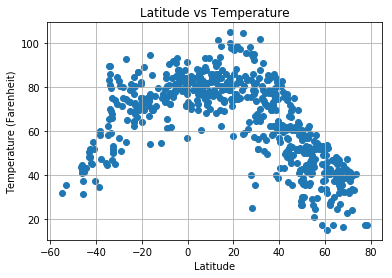

In [33]:
# Build a scatter plot for each data type
plt.scatter(df2["lat"], df2["temp"], marker="o")

# Incorporate the other graph properties
plt.title("Latitude vs Temperature")
plt.ylabel("Temperature (Farenheit)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("LatitudevsTemperature.png")

# Show plot
plt.show()

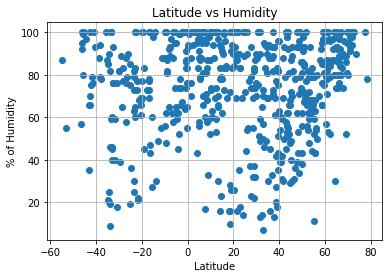

In [37]:
# Plot for Humidity

plt.scatter(df2["lat"], df2["humidity"], marker="o")

# Incorporate the other graph properties
plt.title("Latitude vs Humidity")
plt.ylabel("% of Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("LatitudevsHumidity.png")

# Show plot
plt.show()

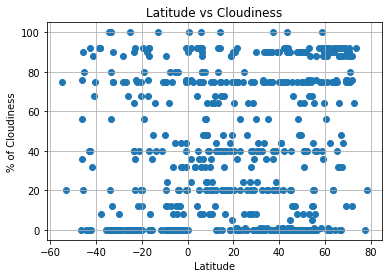

In [38]:
# Plot for Cloudiness

plt.scatter(df2["lat"], df2["clouds"], marker="o")

# Incorporate the other graph properties
plt.title("Latitude vs Cloudiness")
plt.ylabel("% of Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("LatitudevsCloudiness.png")

# Show plot
plt.show()


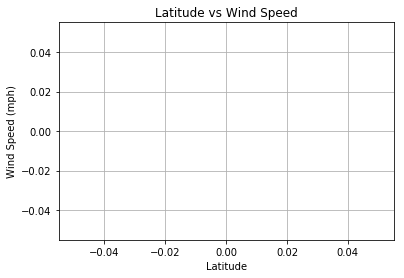

In [39]:
# Plot of Wind Speed
## No data showing in map or dataframe, but the code appears correct according to the openweathermap json. ???

plt.scatter(df2["lat"], df2["wind"], marker="o")

# Incorporate the other graph properties
plt.title("Latitude vs Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("LatitudevsCloudiness.png")

# Show plot
plt.show()

